## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

In [88]:
#主线 Python Decorator > Dynamic Programming > Edit Distance

### Part I Review the online programming. 

In [87]:
#1 Python装饰器的使用
#1.1 func内直接修改
#1.2 脚手架程序
#1.3 普通版本装饰器
#1.4 加Wrap的装饰器，并且可以加多参数支持的*args,**kwargs的形式和标准函数参数和返回注释的形式

In [28]:
#2 动态规划第1版本程序，01背包问题
from collections import defaultdict

original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = p
assert price[1] == 1

In [29]:
print(price)

defaultdict(<class 'int'>, {1: 1, 2: 5, 3: 8, 4: 9, 5: 10, 6: 17, 7: 17, 8: 20, 9: 24, 10: 30})


In [31]:
#First Version
def r(n):
    max_price = max([price[n]] + [r(i) + r(n-i) for i in range(1,n)])
    return max_price

In [76]:
solution = {}
## for a given length N, we set the corrsponding split parts
## solution = 
# {
#     4: (2, 2)
# }

#Second Version Include solution
def r(n):
    """
    @param n: is the length of bags
    @return int: max benefit
    """
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1,n)], key=lambda x:x[0]
    )
    solution[n] = (split_point,n - split_point)
    return max_price

In [77]:
help(r)

Help on function r in module __main__:

r(n)
    @param n: is the length of bags
    @return int: max benefit



In [44]:
import time

In [49]:
# memory version1 
def memory(func):
    cache = {}
    def _wrap(n):
        begin = time.time()
        if n in cache: result = cache[n]
        else:
            result = r(n)
            cache[n] = result
        print('used time: {}'.format(time.time() - begin))
        return result
    return _wrap

In [82]:
# memory version2 add @wraps features in to origin func
def memory(func):
    cache = {}
    @wraps(func)
    def _wrap(n):
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap

In [83]:
from functools import wraps

In [110]:
solution = {}

#Third Version Add Decorator
@memory
def r(n):
    """
    @param n: is the length of bags
    @return int: max benefit
    """
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1,n)], key=lambda x:x[0]
    )
    solution[n] = (split_point,n - split_point)
    return max_price

In [111]:
help(r)

Help on function r in module __main__:

r(n)
    @param n: is the length of bags
    @return int: max benefit



In [112]:
r(13)

38

In [122]:
r(23)

68

In [115]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10)}

In [117]:
#Parse result to detail info
def not_cut(num): return num == 0

def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    
    if not_cut(left): return [right]
    
    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)

In [123]:
parse_solution(23, solution)

[3, 10, 10]


### Part1-2: Finish the Solution Parse Part of Edit-Distance

In [126]:
solution = {}

In [101]:
def edit_distance(string1, string2):
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1],string2) + 1, 'DEL {}'.format(tail_s1)),
        (edit_distance(string1,string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 2, 'SUB {} => {}'.format(tail_s1, tail_s2))
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1,string2)] = operation
    return min_distance
        

In [102]:
edit_distance('1010', '11100')

3

In [103]:
solution

{('1', '1'): '',
 ('1', '10'): 'ADD 0',
 ('1', '101'): '',
 ('1', '11'): 'ADD 1',
 ('1', '111'): 'ADD 1',
 ('1', '1110'): 'ADD 0',
 ('1', '11100'): 'ADD 0',
 ('10', '1'): 'DEL 0',
 ('10', '10'): '',
 ('10', '101'): 'DEL 0',
 ('10', '11'): 'DEL 0',
 ('10', '111'): 'DEL 0',
 ('10', '1110'): '',
 ('10', '11100'): 'ADD 0',
 ('101', '1'): 'DEL 1',
 ('101', '10'): 'DEL 1',
 ('101', '101'): '',
 ('101', '11'): '',
 ('101', '111'): 'ADD 1',
 ('101', '1110'): 'DEL 1',
 ('101', '11100'): 'DEL 1',
 ('1010', '1'): 'DEL 0',
 ('1010', '11'): 'DEL 0',
 ('1010', '111'): 'DEL 0',
 ('1010', '1110'): '',
 ('1010', '11100'): 'ADD 0',
 ('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'SUB A => C',
 ('A', 'ABCCE'): 'SUB A => E',
 ('A', 'ABCCEF'): 'SUB A => F',
 ('A', 'ABCD'): 'SUB A => D',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'SUB B => E',
 ('AB', 'ABCCEF'): 'SUB B => F',
 ('AB', 'ABCD'): 'ADD D',
 ('ABC'

In [127]:
edit_distance('ABCDE', 'ABCCEF')

3

In [128]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'DEL D',
 ('ABCD', 'ABCCE'): 'DEL D',
 ('ABCD', 'ABCCEF'): 'DEL D',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [153]:
#Parse edit distance result to detail info
def parse_solution(string1, string2, revenue_solution):
    if string1 == string2: return []
    operationInfo = revenue_solution[(string1, string2)]
    
    if operationInfo == '': return parse_solution(string1[:-1], string2[:-1], revenue_solution)
    else:
        operator = operationInfo[:3] 
        if operator == 'ADD': return parse_solution(string1, string2[:-1], revenue_solution) + [str(len(string1)) + ' index ' + operationInfo]
        elif operator == 'DEL': return parse_solution(string1[:-1], string2, revenue_solution) + [str(len(string1)) + ' index ' + operationInfo]
        elif operator == 'SUB': return parse_solution(string1[:-1], string2[:-1], revenue_solution) + [ostr(len(string1)) + ' index ' + perationInfo]

In [154]:
parse_solution('ABCDE', 'ABCCEF', solution)

['3 index ADD C', '4 index DEL D', '5 index ADD F']

### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans:递归问题速度非常慢就是因为进行了非常多次相同的递归操作，动态规划本质上新建了一个缓存部分去储存已经进行的递归操作得到的值；动态规划可以解决的问题是问题的子问题具有重复性，这一点差别和搜索问题不一样。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:在规则确定并且没有大量数据集的情况下，动态规划去解决适合它的问题既简洁又准确高效，机器学习不是万能膏药。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:

1 广告竞价系统选择返回的广告，在有限的广告时长内，选择多只广告，广告的总时长不超过限制，并且保证收益最多。

2 汽车改装费用预算固定，汽车改装可以分为引擎ECU升级，排气系统升级，涡轮更改，每一种升级方式里面又有不同的方案，每种方案可以提升不同的马力，费用也不相同，选择一套整体升级方案保证马力最大化(不考虑升级方案会相互影响的问题)就是动态规划问题 

3 背包的背的物品重量有最大限制，现在郊外有各种石头，每种石头有不同价值，希望背包里的石头价值最大化。

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: 

1 搜索引擎根据用户已经输入的词语根据编辑距离去猜测用户最终的搜索词语，并提供出来给用户提前选择

2 文本的相似度判断 

3 DNA相似度检测

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans: 

1 子问题具有重复性 子问题具有重复性意味着可以使用递归解决问题

2 子问题需进行存储 即为把中间的计算结果存储在表中，已经进行过计算的结果直接查表获得，未进行的计算才需要计算，并且会把结果存储在表中

3 反向迭代计算具体结果 动态规划的程序进行完后可以得到需要最大化的结果的值，但是中间具体每一步的选择需要根据存储的表反向迭代得到完成的解决方案

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans: 

动态规划的缺点，消耗空间大，当所给出范围很大时，堆栈中很可能并不能满足所需要的空间大小

## Part 4 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [4]:
import random
import matplotlib.pylab as plt

In [5]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

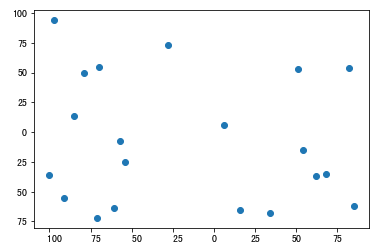

In [6]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [15]:
chosen_p = (5, 10)

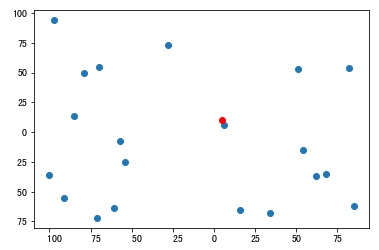

In [16]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')